In [148]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [149]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [150]:
L_kuveta = .1 # m

$\lambda_{светофильтр}$ = 6300 - 6700 A

In [151]:
# калибровка 6-8
z1 = [18.77, 18.84, 18.93, 19.01, 19.1, 19.17]
m1 = [0, 1, 2, 3, 4, 5]
z2 = [18.70, 18.59, 18.56, 18.49, 18.41, 18.35]
m2 = [-1, -2, -3, -4, -5, -6]

m = m2[::-1] + m1
z = z2[::-1] + z1
print(m, z)

[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5] [18.35, 18.41, 18.49, 18.56, 18.59, 18.7, 18.77, 18.84, 18.93, 19.01, 19.1, 19.17]


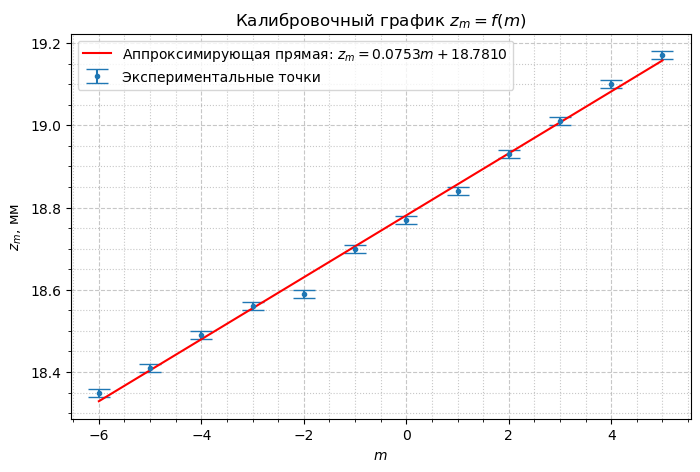

0.0014788735617007635


In [152]:
m_values = np.array([-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
z_m = np.array([18.35, 18.41, 18.49, 18.56, 18.59, 18.70, 18.77, 18.84, 18.93, 19.01, 19.10, 19.17])
sigma_z = np.array([0.01] * len(m_values))

# Plotting
plt.figure(figsize=(8, 5))
plt.errorbar(m_values, z_m, yerr=sigma_z, fmt='.', capsize=8, label=r'Экспериментальные точки')

# Linear fit (least squares approximation)
coeffs = np.polyfit(m_values, z_m, 1)  # Fit a straight line (degree = 1)
coeffs = LeastSquares(m_values, z_m)
linear_fit = np.poly1d(coeffs[:2])  # Create a polynomial function

# Generate smooth values for the fitted line
m_fit = np.linspace(min(m_values), max(m_values), 100)
z_fit = linear_fit(m_fit)
plt.plot(m_fit, z_fit, 'r', label=f'Аппроксимирующая прямая: $z_m = {coeffs[0]:.4f}m + {coeffs[1]:.4f}$')

# Labels and title
plt.xlabel(r'$m$')
plt.ylabel(r'$z_m$, мм')
plt.title("Калибровочный график $z_m = f(m)$")

# Grid and legend
plt.minorticks_on()
plt.grid(True, linestyle='--', alpha=0.7, which='major')
plt.grid(True, linestyle=':', alpha=0.7, which='minor')
plt.legend()
plt.show()
print(coeffs[2])

In [153]:
P_equal = -100 # mm h2o
P1 = [0, -200, -350, -500, -700] # mm H20
z_01 = [18.69, 18.84, 18.91, 18.98, 19.04]

P2 = [100, 300, 400, 600, 700, 800]
z_02 = [18.71, 18.60, 18.53, 18.47, 18.42, 18.36]

P = P1[::-1] + P2
P = [-p/100 - 1 for p in P]
z_0 = z_01[::-1] + z_02
print(P, z_0)

[6.0, 4.0, 2.5, 1.0, -1.0, -2.0, -4.0, -5.0, -7.0, -8.0, -9.0] [19.04, 18.98, 18.91, 18.84, 18.69, 18.71, 18.6, 18.53, 18.47, 18.42, 18.36]


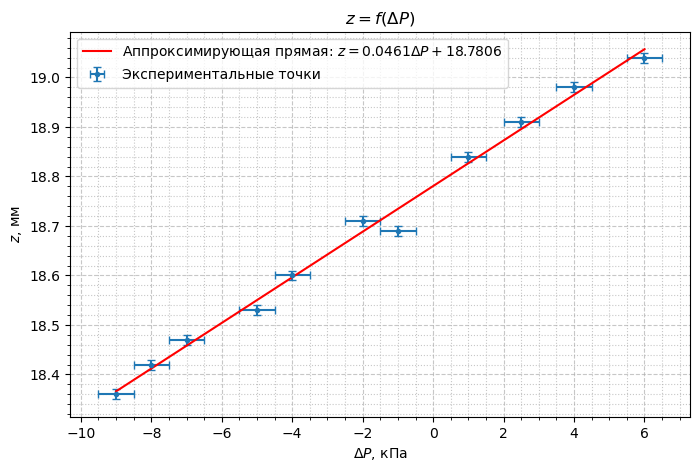

In [154]:
m_values = np.array(P)
z_m = np.array(z_0)
sigma_z = np.array([0.01] * len(m_values))
sigma_m = np.array([0.50] * len(m_values))

# Plotting
plt.figure(figsize=(8, 5))
plt.errorbar(m_values, z_m, xerr=sigma_m, yerr=sigma_z, fmt='.', capsize=3, label=r'Экспериментальные точки')

# Linear fit (least squares approximation)
coeffs = np.polyfit(m_values, z_m, 1)  # Fit a straight line (degree = 1)
coeffs = LeastSquares(m_values, z_m)  # Fit a straight line (degree = 1)
linear_fit = np.poly1d(coeffs[:2])  # Create a polynomial function

# Generate smooth values for the fitted line
m_fit = np.linspace(min(m_values), max(m_values), 100)
z_fit = linear_fit(m_fit)
plt.plot(m_fit, z_fit, 'r', label=f'Аппроксимирующая прямая: $z = {coeffs[0]:.4f} \\Delta P + {coeffs[1]:.4f}$')

# Labels and title
plt.xlabel(r'$\Delta P$, кПа')
plt.ylabel(r'$z$, мм')
plt.title("$z = f(\\Delta P)$")

# Grid and legend
plt.minorticks_on()
plt.grid(True, linestyle='--', alpha=0.7, which='major')
plt.grid(True, linestyle=':', alpha=0.7, which='minor')
plt.legend()
plt.show()

In [155]:
k = 1.38 * 1e-23
coeffs[0] * k * 298 / 2 / math.pi / .1 /1e6

np.float64(3.015839272521676e-28)

In [156]:
alpha = coeffs[0] / (0.075 * 1e-3) * (6700 * 1e-10 * 1.38 * 1e-23 * 298)/(2 * math.pi * .1) /1e6
alpha

np.float64(2.6941497501193643e-30)

In [157]:
a = coeffs[2] * 1e-6
b = 0.075 * 1e-3
berr = 0.0014788735617007635 * 1e-3
sigma_alpha = (6700*1e-10 * k * 298)/(2 * math.pi * L_kuveta) * math.sqrt(
  (a/b)**2 +
  (coeffs[0] / 1e6 * berr / b**2)**2
)
sigma_alpha

9.400077545435443e-32

In [158]:
r = (alpha/(4*np.pi))**(1/3)
sigma_r = (1/(4*np.pi))**(1/3) * sigma_alpha/(3 * alpha**(2/3))
print(r, sigma_r)

5.985089133192196e-11 6.960798667044748e-13


In [159]:
z_0 = 19.55 # открыли балон
z_0 = []

In [160]:
z_min = [17.95, 17.92, 17.83, 17.76, 17.72, 17.67, 17.67, 17.62, 17.57, 17.54, 17.53, 17.47, 17.45, 17.40, 17.34, 17.34]

In [161]:
P_0 = 100 * 1e3
T_0 = 273
sigma_P = 1 * 1e3
sigma_T = 1

n_0 = 1 + 2 * np.pi * alpha * 102 * 1e3 / (k * 298)
sigma_n_0 = 2 * np.pi / k * math.sqrt(
  (sigma_alpha * P_0 / T_0)**2 +
  (alpha * sigma_P / T_0)**2 +
  (alpha * sigma_T * P_0 / T_0**2)**2
)
print(n_0, sigma_n_0)

1.0004198618560403 1.639127669517305e-05


In [162]:
P = 102 * 1e3
T = 298
n = 1 + (n_0 - 1) * T_0 * P / T / P_0
sigma_n = T_0 / P_0 * math.sqrt(
  (sigma_n_0 * P / T)**2 +
  ((n_0 - 1) * sigma_P / T)**2 +
  ((n_0 - 1) * sigma_T * P / T**2)**2
)
print(n, sigma_n)

1.0003923313168892 1.5846858903654526e-05


In [163]:
lambd = 6700 * 1e-10
tgphi = 0.075 * 1e-3
delta_n = lambd / tgphi / L_kuveta * 0.51 * 1e-3
sigma_delta_n = lambd / L_kuveta * math.sqrt(
  (berr / b**2 * 0.51 * 1e-3)**2 +
  (0.01 * 1e-3 /b)**2
)
print(delta_n + n, math.sqrt(sigma_delta_n**2 + sigma_n**2))

1.0004378913168892 1.589742254998455e-05


In [164]:
lambd = 6700 * 1e-10
tgphi = 0.075 * 1e-3
delta_n = lambd / tgphi / L_kuveta * 0.40 * 1e-3
sigma_delta_n = lambd / L_kuveta * math.sqrt(
  (berr / b**2 * 0.51 * 1e-3)**2 +
  (0.01 * 1e-3 /b)**2
)
print(delta_n, math.sqrt(sigma_delta_n**2))

3.573333333333334e-05 1.266928024957428e-06


In [165]:
lambd = 6700 * 1e-10
tgphi = 0.075 * 1e-3
delta_n = lambd / tgphi / L_kuveta * 0.42 * 1e-3
sigma_delta_n = lambd / L_kuveta * math.sqrt(
  (berr / b**2 * 0.51 * 1e-3)**2 +
  (0.01 * 1e-3 /b)**2
)
print(delta_n, math.sqrt(sigma_delta_n**2))

3.752000000000001e-05 1.266928024957428e-06
